# **Indian Food Analysis**

## **Importing Important Libraries & Dataset :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("indian_food.csv")

In [3]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## **Filling Null Values & Checking for the Outliers and Duplicates :**

In [4]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [7]:
data.fillna(data['region'].mode()[0],inplace = True)

In [8]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [13]:
data['region'].unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central'],
      dtype=object)

In [42]:
data['flavor_profile'].unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [43]:
data.drop(data[data['flavor_profile'] == '-1'].index,inplace = True)

In [28]:
data.drop(data[data['region'] == '-1'].index,inplace = True)

In [29]:
data['region'].unique()

array(['East', 'West', 'North', 'North East', 'South', 'Central'],
      dtype=object)

# **Data Visualization ⚓ :**

## **Distribution of Dishes by Region :**

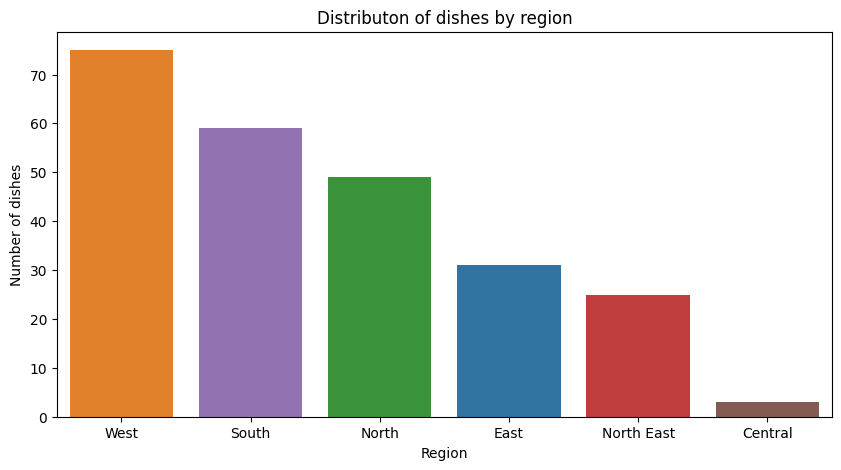

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'region', order=data['region'].value_counts().index,hue = 'region')
plt.title("Distributon of dishes by region")
plt.xlabel("Region")
plt.ylabel("Number of dishes")
plt.show()

## **Fistribution of Diet by Types :**

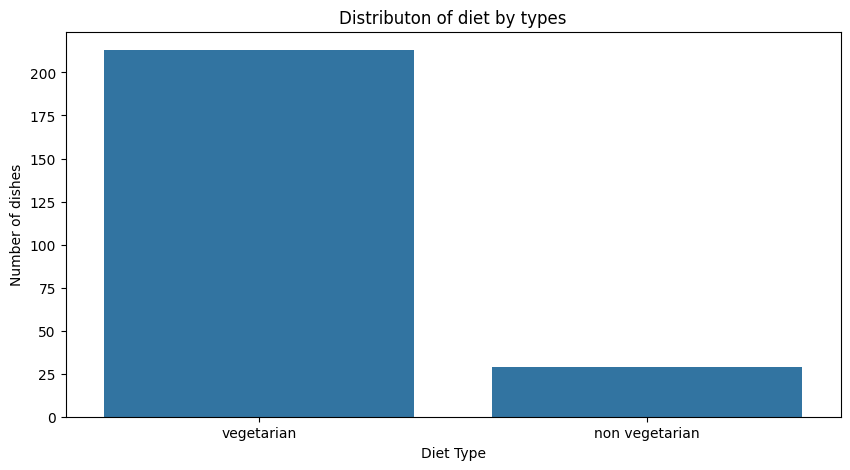

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'diet')
plt.title("Distributon of diet by types")
plt.xlabel("Diet Type")
plt.ylabel("Number of dishes")
plt.show()

## **Total Vegeterian Orders by Region :**

In [36]:
diet_by_region = data.groupby(by = ['region','diet']).size().reset_index(name='count')

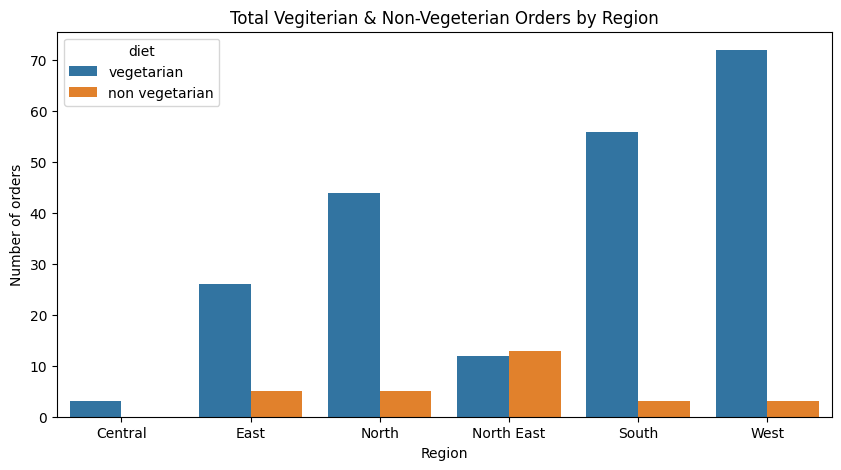

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(x='region',y='count',hue='diet',data = diet_by_region)
plt.title('Total Vegiterian & Non-Vegeterian Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of orders')
plt.show()

## **Number of Dishes by Flavor Profile :**

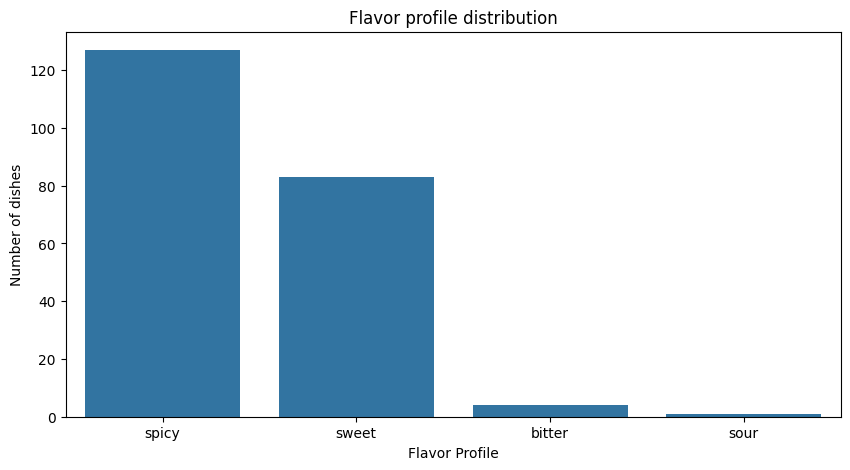

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'flavor_profile',order=data['flavor_profile'].value_counts().index)
plt.title("Flavor profile distribution")
plt.xlabel("Flavor Profile")
plt.ylabel("Number of dishes")
plt.show()

## **Average Preparation and Cooking Time per region :**


In [51]:
avg_time = data.groupby('region')[['prep_time','cook_time']].mean().reset_index()

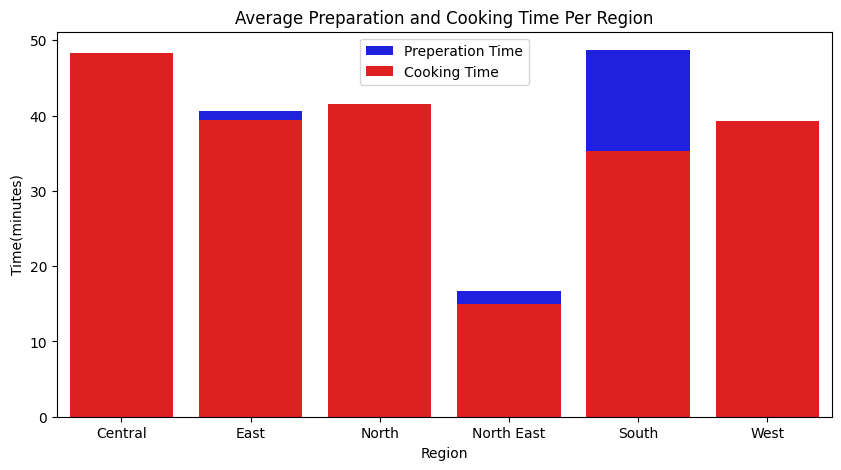

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='prep_time',data=avg_time,label='Preperation Time',color = 'b')
sns.barplot(x='region',y='cook_time',data=avg_time,label='Cooking Time',color = 'r')
plt.title('Average Preparation and Cooking Time Per Region')
plt.xlabel('Region')
plt.ylabel('Time(minutes)')
plt.legend
plt.show()

# **Top 5 States with the Most Dishes ☝:**

In [56]:
state_count = data['state'].value_counts().head(5)
state_count

state
Gujarat        32
Punjab         30
Maharashtra    26
West Bengal    22
Assam          17
Name: count, dtype: int64

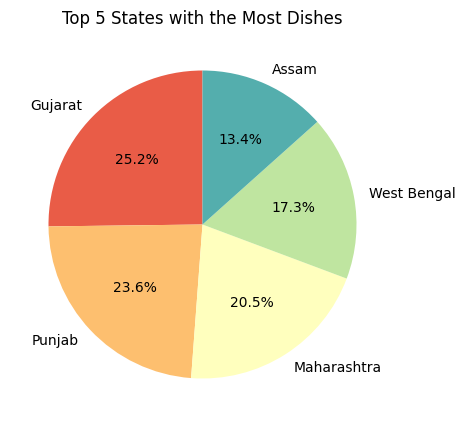

In [69]:
plt.figure(figsize=(12,5))
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Spectral", 5))
plt.title('Top 5 States with the Most Dishes')
plt.show()